# Test de l'opérateur de convection dans Problem

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), '..'))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path
savefig_path = '/home/as259691/Documents/rapports/article_JCP_fr/figures/'
save_fig = False

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib notebook
rc('figure', figsize=(10,5))
rc('figure', dpi=100)
rc('font', size=18)
rc('legend', fontsize=16)

## Test des 3 opérateurs à maillage constant

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
n_lim = 10000000
t_fin_lim = 100.

In [4]:
# d = 6./100*Delta/2.
dx = 1.*10**-4
phy_prop_conv = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                                   lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=0.,
                                   alpha=0.2, a_i=357.)
phy_prop_no_conv = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                                   lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=0.,
                                   alpha=0.2, a_i=357.)
num_prop_weno = NumericalProperties(dx=dx, schema='weno', time_scheme='rk3', phy_prop=phy_prop_conv, cfl=0.5)
num_prop_quick = NumericalProperties(dx=dx, schema='quick', time_scheme='rk3', phy_prop=phy_prop_conv, cfl=0.5)
num_prop_upwind = NumericalProperties(dx=dx, schema='upwind', time_scheme='rk3', phy_prop=phy_prop_conv, cfl=0.5)
# markers = Bulles(phy_prop=phy_prop_conv, x=num_prop.x, n_bulle=1)
markers = Bulles(phy_prop=phy_prop_conv, n_bulle=1)
markers.shift(0.00401)

<IPython.core.display.Javascript object>


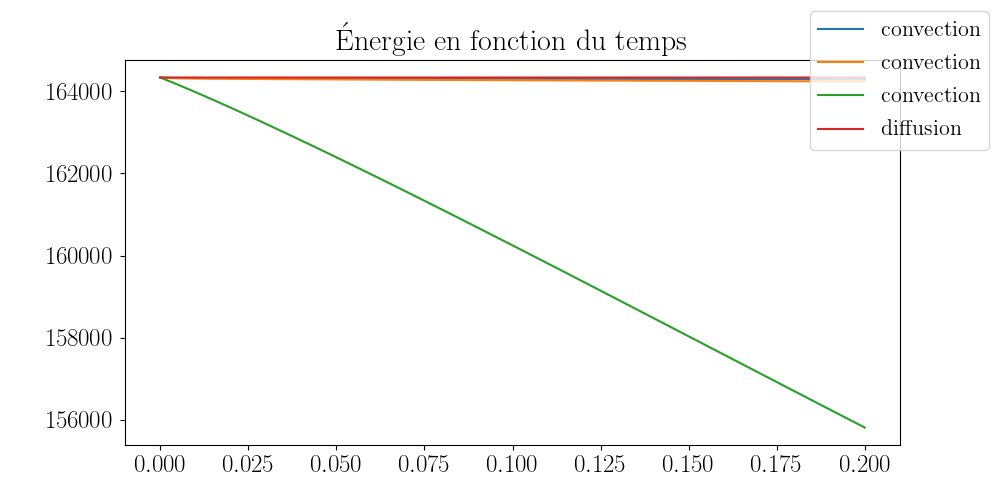

dt fourier
4.534064516129032e-05
convection


<IPython.core.display.Javascript object>


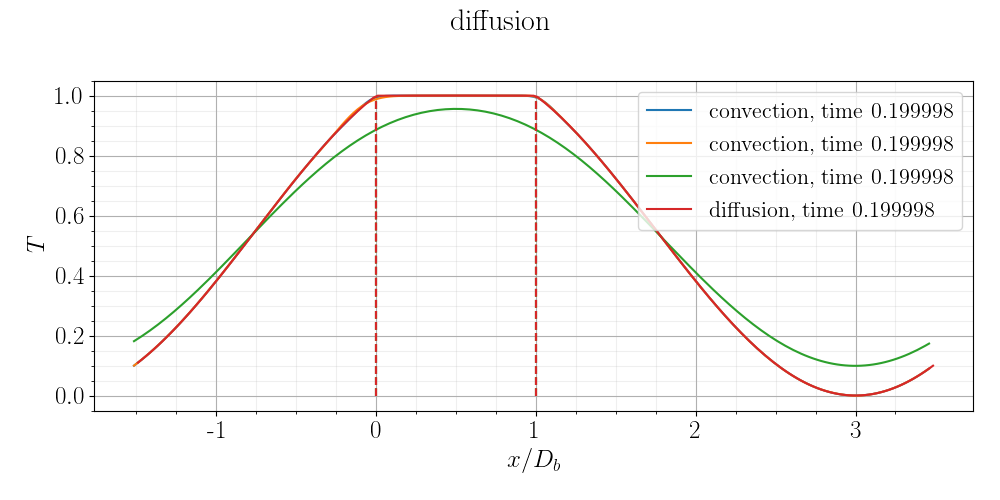

dt fourier
4.534064516129032e-05
convection
dt fourier
4.534064516129032e-05
convection
dt fourier
4.534064516129032e-05
diffusion


In [5]:
t_fin = 0.2
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')

plot = Plotter('decale')
prob_conv_weno = Problem(get_T, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_weno)
print(prob_conv_weno.name)
print('==========================')
t, e = prob_conv_weno.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_weno.name)

prob_conv_quick = Problem(get_T, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_quick)
print(prob_conv_quick.name)
print('==========================')
t, e = prob_conv_quick.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_quick.name)

prob_conv_upwind = Problem(get_T, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_upwind)
print(prob_conv_upwind.name)
print('==========================')
t, e = prob_conv_upwind.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_upwind.name)

prob_no_conv = Problem(get_T, markers=markers, phy_prop=phy_prop_no_conv, num_prop=num_prop_weno)
print(prob_no_conv.name)
print('==========================')
t1, e1 = prob_no_conv.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t1, e1/(0.02*0.005*0.005), label=prob_no_conv.name)

le = fig1.legend()

<IPython.core.display.Javascript object>


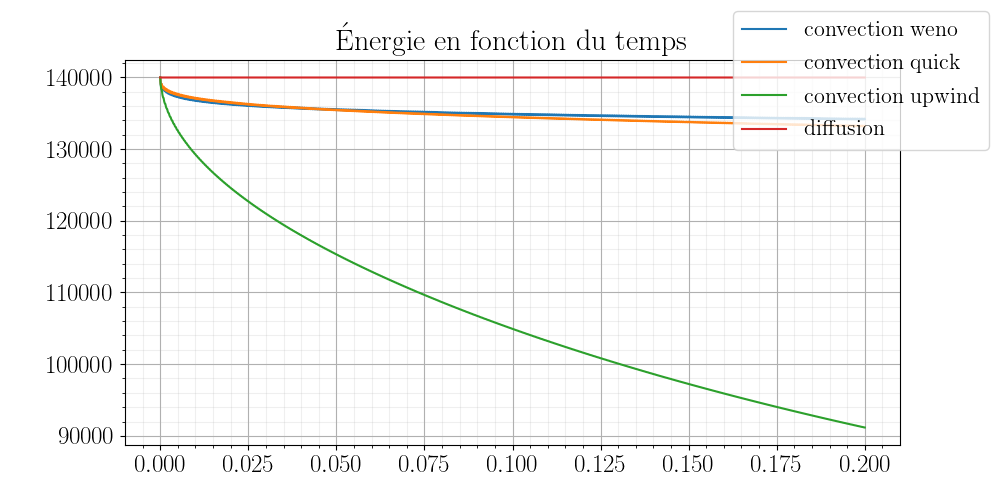

dt fourier
4.534064516129032e-05
convection


<IPython.core.display.Javascript object>


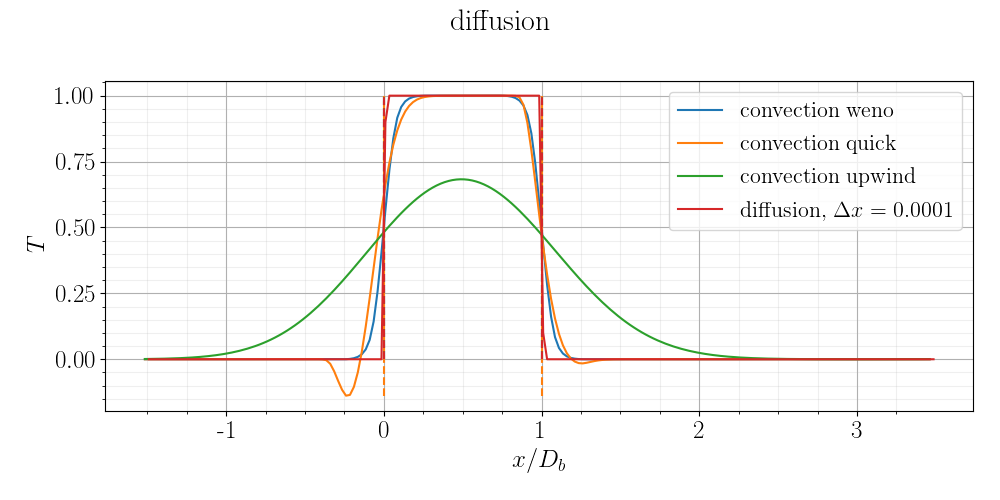

dt fourier
4.534064516129032e-05
convection
dt fourier
4.534064516129032e-05
convection
dt fourier
4.534064516129032e-05
diffusion


In [6]:
t_fin = 0.2
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')

plot = Plotter('decale')
prob_conv_weno = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_weno)
print(prob_conv_weno.name)
print('==========================')
t, e = prob_conv_weno.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_weno.name + ' weno')

prob_conv_quick = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_quick)
print(prob_conv_quick.name)
print('==========================')
t, e = prob_conv_quick.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_quick.name + ' quick')

prob_conv_upwind = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_upwind)
print(prob_conv_upwind.name)
print('==========================')
t, e = prob_conv_upwind.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_upwind.name + ' upwind')

prob_no_conv = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_no_conv, num_prop=num_prop_weno)
print(prob_no_conv.name)
print('==========================')
t1, e1 = prob_no_conv.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t1, e1/(0.02*0.005*0.005), label=prob_no_conv.name)

le = fig1.legend()
ax1.minorticks_on()
ax1.grid(b=True, which='major')
ax1.grid(b=True, which='minor', alpha=0.2)

handles, labels = plot.ax.get_legend_handles_labels()
add_legend = [' weno', ' quick', ' upwind', r', $\Delta x = %g$' % num_prop_weno.dx]
labels = [lab.split(',')[0] + add_legend[i] for i,lab in enumerate(labels)]
plot.ax.legend(handles, labels)
if save_fig:
    plot.fig.savefig(savefig_path+'temperature_comparaison_convection.pdf')
    fig1.savefig(savefig_path+'energy_loss_comparaison_convection.pdf')

**Remarque** :

**Le Quick est oscillant donc prend des valeurs négatives, et est instable avec la diffusion centrée 2**

## Test des 3 opérateurs en convergence de maillage

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

In [7]:
n_lim = 10**8
t_fin_lim = 100.

In [8]:
# d = 6./100*Delta/2.
dx_l = [2.*10**-4, 1.*10**-4, 5.*10**-5, 2.5*10**-5]
phy_prop_conv = PhysicalProperties(Delta=0.01, v=0.2, dS=0.005**2,
                                   lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=0.,
                                   alpha=0.25, a_i=357.)
phy_prop_no_conv = PhysicalProperties(Delta=0.01, v=0., dS=0.005**2,
                                   lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=0.,
                                   alpha=0.25, a_i=357.)
num_prop_weno_l = [NumericalProperties(dx=dx, schema='weno', time_scheme='rk3', phy_prop=phy_prop_conv, cfl=0.5) for dx in dx_l]
num_prop_quick_l = [NumericalProperties(dx=dx, schema='quick', time_scheme='rk3', phy_prop=phy_prop_conv, cfl=0.5) for dx in dx_l]
num_prop_upwind_l = [NumericalProperties(dx=dx, schema='upwind', time_scheme='rk3', phy_prop=phy_prop_conv, cfl=0.5) for dx in dx_l]
# markers = Bulles(phy_prop=phy_prop_conv, x=num_prop.x, n_bulle=1)
markers = Bulles(phy_prop=phy_prop_conv, n_bulle=1)
markers.shift(0.00001)

<IPython.core.display.Javascript object>


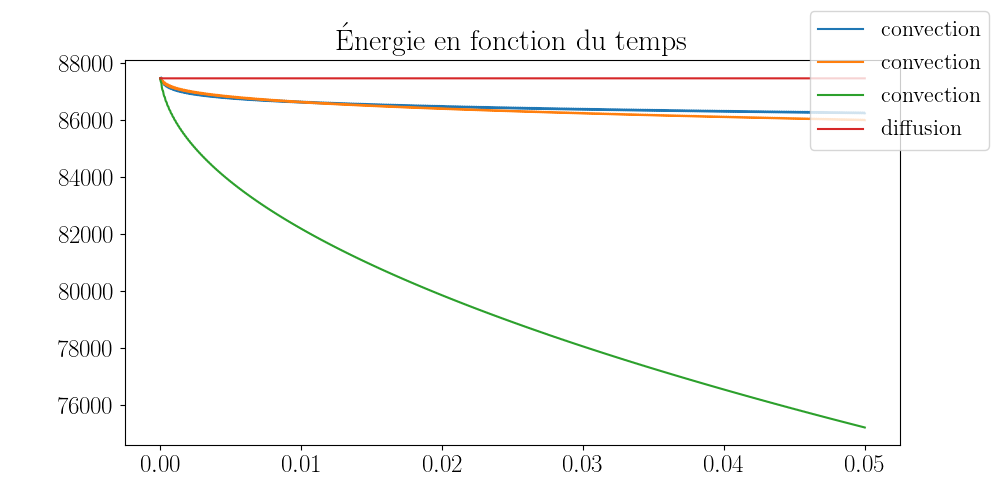

dt fourier
0.00018136258064516128
convection


<IPython.core.display.Javascript object>


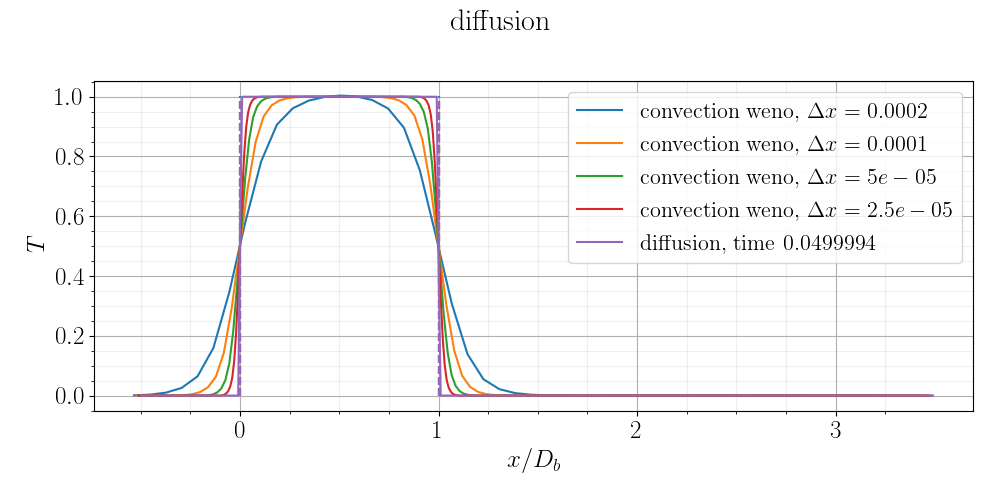

dt fourier
4.534064516129032e-05
convection
dt fourier
1.133516129032258e-05
convection
dt fourier
2.833790322580645e-06
convection
dt fourier
0.00018136258064516128
convection


<IPython.core.display.Javascript object>


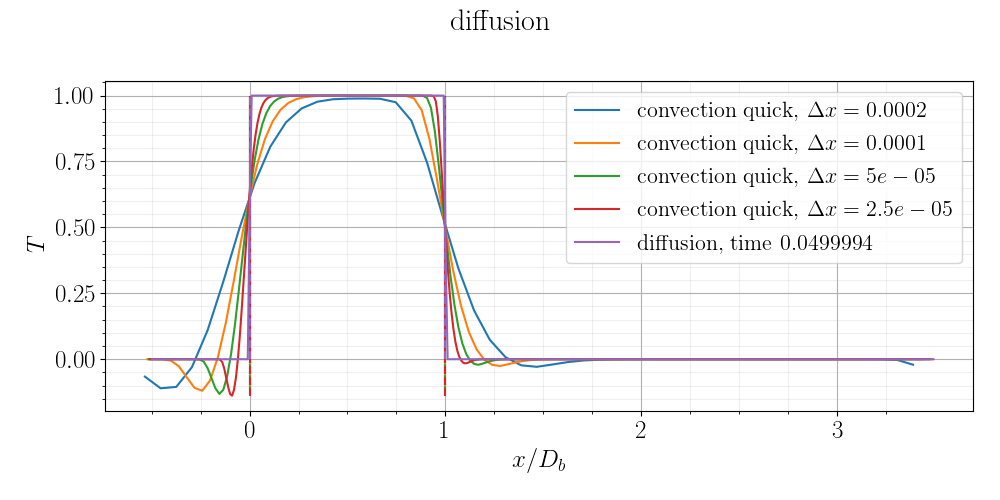

dt fourier
4.534064516129032e-05
convection
dt fourier
1.133516129032258e-05
convection
dt fourier
2.833790322580645e-06
convection
dt fourier
0.00018136258064516128
convection


<IPython.core.display.Javascript object>


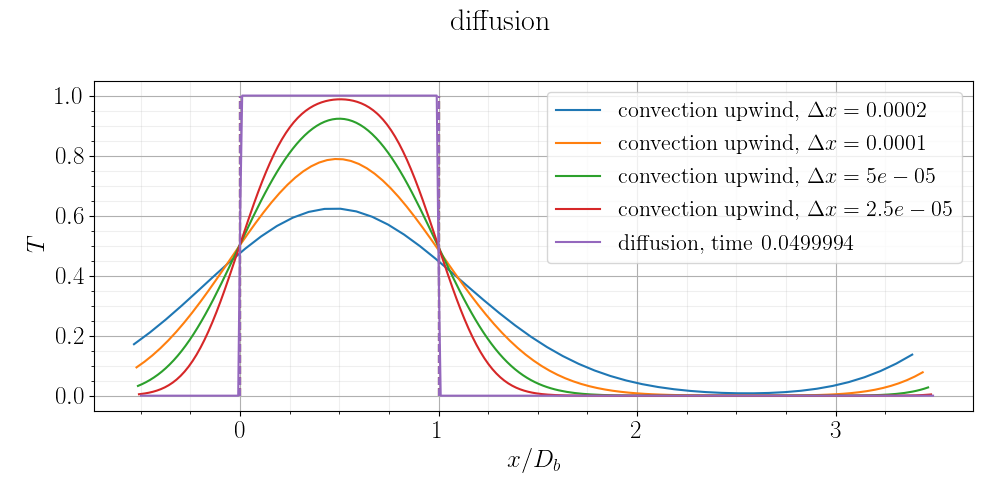

dt fourier
4.534064516129032e-05
convection
dt fourier
1.133516129032258e-05
convection
dt fourier
2.833790322580645e-06
convection
dt fourier
2.833790322580645e-06
diffusion


In [9]:
t_fin = 0.05
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')

plot_weno = Plotter('decale')
for num_prop_weno in num_prop_weno_l:
    prob_conv_weno = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_weno)
    print(prob_conv_weno.name)
    print('==========================')
    t, e = prob_conv_weno.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot_weno)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_weno.name)

plot_quick = Plotter('decale')
for num_prop_quick in num_prop_quick_l:
    prob_conv_quick = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_quick)
    print(prob_conv_quick.name)
    print('==========================')
    t, e = prob_conv_quick.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot_quick)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_quick.name)

plot_upwind = Plotter('decale')
for num_prop_upwind in num_prop_upwind_l:
    prob_conv_upwind = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_upwind)
    print(prob_conv_upwind.name)
    print('==========================')
    t, e = prob_conv_upwind.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot_upwind)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_upwind.name)

prob_no_conv = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_no_conv, num_prop=num_prop_weno)
print(prob_no_conv.name)
print('==========================')
t1, e1 = prob_no_conv.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot_weno, plot_quick, plot_upwind])
l = ax1.plot(t1, e1/(0.02*0.005*0.005), label=prob_no_conv.name)

le = fig1.legend()
    
handles, labels = plot_weno.ax.get_legend_handles_labels()
labels[:-1] = [lab.split(',')[0] + r' weno, $\Delta x = %g$' % num_prop_weno_l[i].dx for i, lab in enumerate(labels[:-1])]
le = plot_weno.ax.legend(handles, labels)

handles, labels = plot_quick.ax.get_legend_handles_labels()
labels[:-1] = [lab.split(',')[0] + r' quick, $\Delta x = %g$' % num_prop_quick_l[i].dx for i, lab in enumerate(labels[:-1])]
le = plot_quick.ax.legend(handles, labels)

handles, labels = plot_upwind.ax.get_legend_handles_labels()
labels[:-1] = [lab.split(',')[0] + r' upwind, $\Delta x = %g$' % num_prop_upwind_l[i].dx for i, lab in enumerate(labels[:-1])]
le = plot_upwind.ax.legend(handles, labels)

if save_fig:
    plot_weno.fig.savefig(savefig_path+'temperature_convection_weno_convergence.pdf')
    plot_quick.fig.savefig(savefig_path+'temperature_convection_quick_convergence.pdf')
    plot_upwind.fig.savefig(savefig_path+'temperature_convection_upwind_convergence.pdf')

## Avec la diffusion

In [10]:
n_lim = 100
t_fin_lim = 100.

In [11]:
# d = 6./100*Delta/2.
dx = 2*10**-4
phy_prop_conv = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                                   lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                                   alpha=0.06, a_i=357.)
phy_prop_no_conv = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                                   lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                                   alpha=0.06, a_i=357.)
num_prop_weno = NumericalProperties(dx=dx, schema='weno', time_scheme='rk3', phy_prop=phy_prop_conv, cfl=0.5)
num_prop_quick = NumericalProperties(dx=dx, schema='quick', time_scheme='rk3', phy_prop=phy_prop_conv, cfl=0.5)
num_prop_upwind = NumericalProperties(dx=dx, schema='upwind', time_scheme='rk3', phy_prop=phy_prop_conv, cfl=0.5)
# markers = Bulles(phy_prop=phy_prop_conv, x=num_prop.x, n_bulle=1)
markers = Bulles(phy_prop=phy_prop_conv, n_bulle=1)
markers.shift(0.00801)

<IPython.core.display.Javascript object>


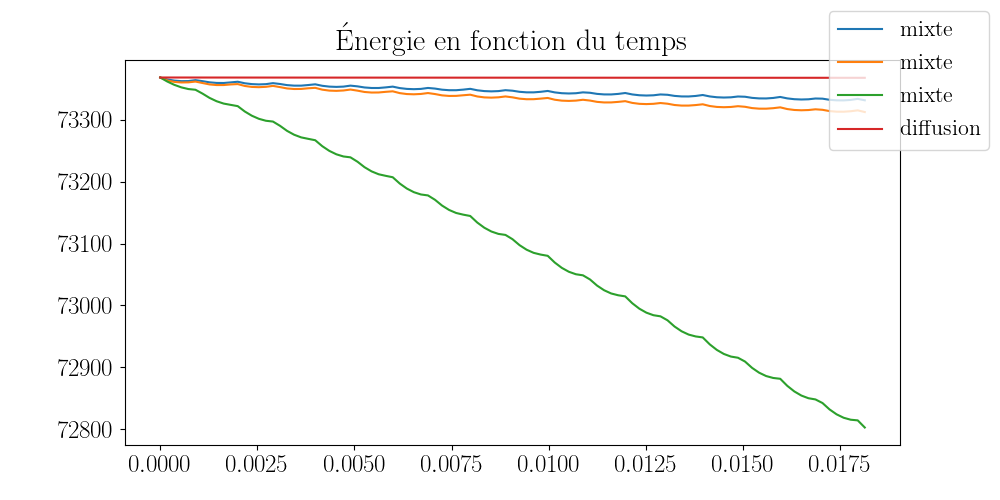

dt fourier
0.00018136258064516128
mixte


<IPython.core.display.Javascript object>


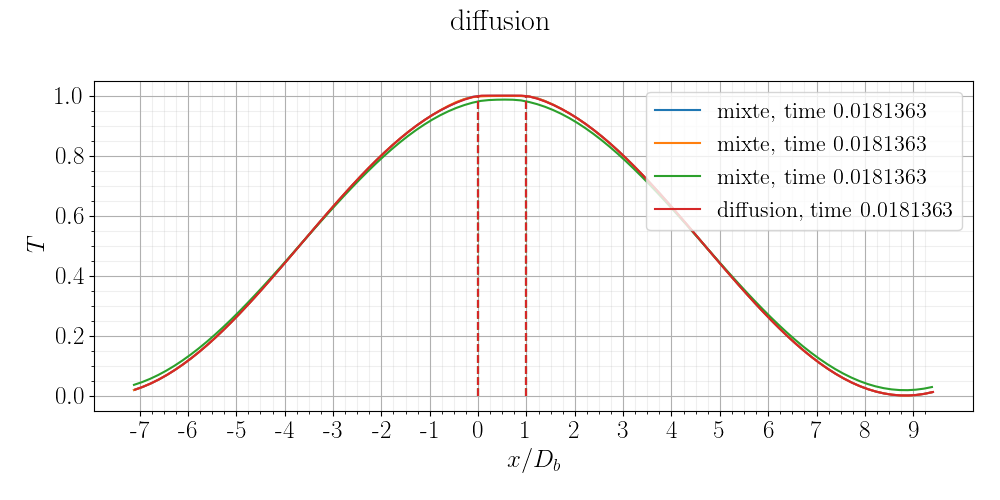

dt fourier
0.00018136258064516128
mixte
dt fourier
0.00018136258064516128
mixte
dt fourier
0.00018136258064516128
diffusion


In [12]:
t_fin = 0.2
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')

plot = Plotter('decale')
prob_conv_weno = Problem(get_T, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_weno)
print(prob_conv_weno.name)
print('==========================')
t, e = prob_conv_weno.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_weno.name)

prob_conv_quick = Problem(get_T, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_quick)
print(prob_conv_quick.name)
print('==========================')
t, e = prob_conv_quick.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_quick.name)

prob_conv_upwind = Problem(get_T, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_upwind)
print(prob_conv_upwind.name)
print('==========================')
t, e = prob_conv_upwind.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_upwind.name)

prob_no_conv = Problem(get_T, markers=markers, phy_prop=phy_prop_no_conv, num_prop=num_prop_weno)
print(prob_no_conv.name)
print('==========================')
t1, e1 = prob_no_conv.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t1, e1/(0.02*0.005*0.005), label=prob_no_conv.name)

le = fig1.legend()

<IPython.core.display.Javascript object>


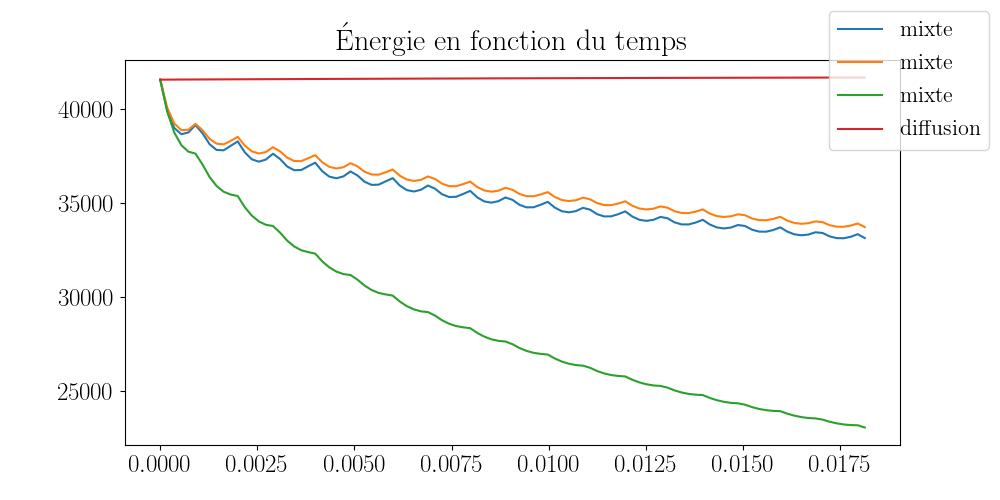

dt fourier
0.00018136258064516128
mixte


<IPython.core.display.Javascript object>


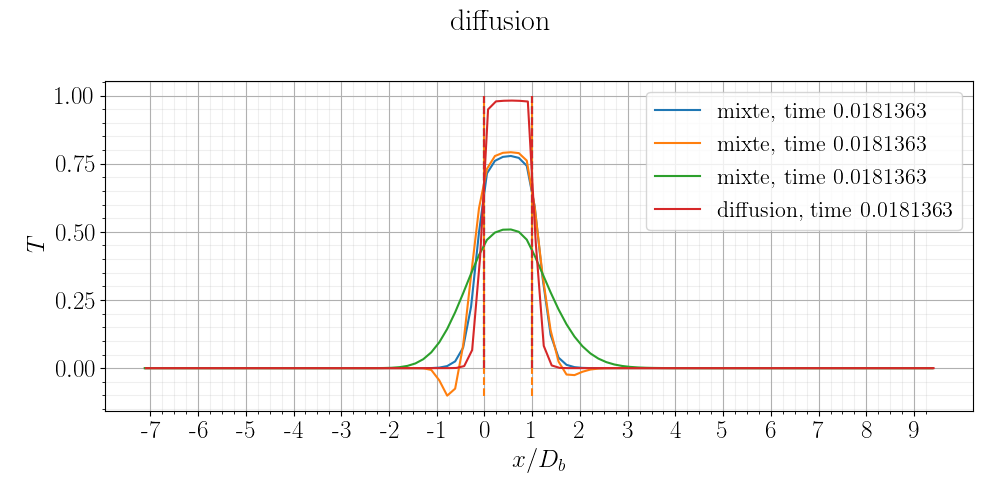

dt fourier
0.00018136258064516128
mixte
dt fourier
0.00018136258064516128
mixte
dt fourier
0.00018136258064516128
diffusion


In [13]:
t_fin = 0.2
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')

plot = Plotter('decale')
prob_conv_weno = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_weno)
print(prob_conv_weno.name)
print('==========================')
t, e = prob_conv_weno.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_weno.name)

prob_conv_quick = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_quick)
print(prob_conv_quick.name)
print('==========================')
t, e = prob_conv_quick.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_quick.name)

prob_conv_upwind = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_upwind)
print(prob_conv_upwind.name)
print('==========================')
t, e = prob_conv_upwind.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_conv_upwind.name)

prob_no_conv = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_no_conv, num_prop=num_prop_weno)
print(prob_no_conv.name)
print('==========================')
t1, e1 = prob_no_conv.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
l = ax1.plot(t1, e1/(0.02*0.005*0.005), label=prob_no_conv.name)

le = fig1.legend()


**Remarque** :

**Le Quick est stable avec la diffusion centrée 2 harmonique à l'interface mais instable avec la diffusion centrée 2**